In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

!whoami
!date

nicoly
Tue Feb 16 02:56:19 PST 2021


In [2]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats 
from scipy import stats

No handles with labels found to put in legend.


alpha=1.2, beta=3.4666666666666672
median=65.45424942006015, mean=68.0
central 95% interval = (51.00109505168729, 97.91215690188781)




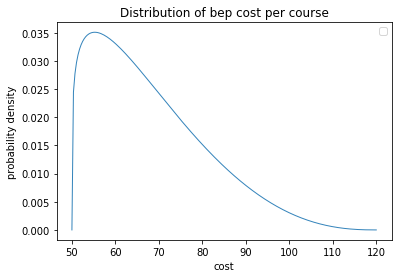

In [3]:
#beta distribution of bep cost (from RNDS study from GATES)

#min=loc and max=loc+scale
loc = 50
scale = 70
mean = 68
# divide median by scale to get median of unscaled beta distribution

a = 1.2
b = a*(1-((mean-loc)/(scale)))/((mean-loc)/(scale))
   
beta_dist = stats.beta(a, b, loc, scale)

x = np.linspace(loc, loc+scale, 200)
fig, ax = plt.subplots(1,1)
ax.set_title('Distribution of bep cost per course')
ax.set_xlabel('cost')
ax.set_ylabel('probability density')
ax.legend()

print(f'alpha={a}, beta={b}')
print(f'median={beta_dist.median()}, mean={beta_dist.mean()}')
print(f'central 95% interval = {beta_dist.interval(0.95)}')
print('\n')
    
# Test with alpha=1.5

ax.plot(x, beta_dist.pdf(x), lw=1, alpha=0.9)

In [4]:
give_me_a_bep_cost = scipy.stats.beta.rvs(a, b, loc, scale, size=100)
print(give_me_a_bep_cost)
print(len(give_me_a_bep_cost))

[53.57593337 60.46380882 62.66899448 72.92984181 86.84837678 90.90059756
 69.25106049 58.11756389 59.65730041 69.20975103 75.10482084 67.2832121
 54.89878262 80.78925678 78.61572598 65.40196632 56.04352203 52.66745974
 83.83092644 92.27909503 69.02039202 61.37053355 61.54264526 61.18239908
 80.35433264 77.30689626 60.57749384 71.9830119  66.89756689 62.36521525
 55.06031659 52.52428498 67.63225496 73.72862834 65.48445416 57.92440705
 54.13219865 60.63777611 54.63164148 61.84424784 65.56359498 58.57331367
 66.82864528 72.43769097 63.18933247 65.10071002 60.83719663 97.34230704
 62.70298901 97.9501978  85.12467914 59.80084838 61.62409999 74.11305659
 67.18610888 60.75341686 64.49837216 56.35667644 85.64782658 68.14017811
 69.74524048 65.69851449 56.16146616 65.59012384 65.20436867 58.92131288
 55.49962746 68.79737273 66.80147353 66.98487939 77.23141635 78.49057175
 67.92815323 80.98293316 51.23234131 65.47557548 51.29373915 60.12480657
 71.32730569 90.21892432 60.81183531 64.53664688 63.

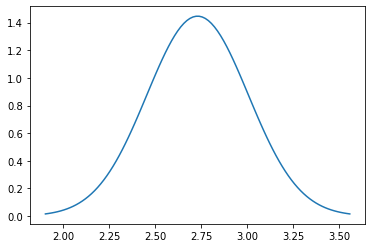

In [5]:
#cost of IFA

mu_ifa = 2.73
sigma_ifa = (mu_ifa*1.2 - mu_ifa*0.8)/(2*1.98)

x = np.linspace(mu_ifa - 3*sigma_ifa, mu_ifa + 3*sigma_ifa, 100)
plt.plot(x, stats.norm.pdf(x, mu_ifa, sigma_ifa))
plt.show()

In [6]:
#cost of IFA

give_me_an_ifa_cost = np.random.normal(mu_ifa, sigma_ifa, size=100)
print(give_me_an_ifa_cost)
pd.Series(give_me_an_ifa_cost).describe(percentiles = [0.025,0.975])

[2.30740144 2.80378364 2.77993232 3.04368193 2.67443851 2.91769637
 3.01086206 2.6305067  3.11431411 2.73959968 2.66510551 2.81163862
 2.30240151 2.90890247 2.70355074 2.28304361 2.89627272 2.44790713
 3.06315867 2.80011169 2.74936309 2.90205802 3.12471602 2.66908336
 2.59336241 2.98659418 2.37649077 2.91195737 2.81807106 1.98867693
 2.93467478 2.42357587 2.12269294 2.84224623 2.73980023 2.76608875
 2.62595675 3.11456464 2.7864197  2.32014889 2.87994331 2.94566141
 2.54093024 2.3867584  2.95086401 2.59987233 3.16135612 2.79039769
 2.48465952 2.94621656 2.75312282 2.66949617 2.57707392 2.91931602
 2.05786229 2.60174882 1.93853866 3.02034965 2.53350083 2.99529076
 2.79132522 3.37690697 2.52688178 2.11049941 2.9151986  2.35592209
 2.18652255 2.65254923 2.8088906  2.63346855 2.66228434 2.55196086
 2.26647135 2.65370933 2.51420804 2.88120431 3.03045872 2.47776292
 2.5491771  2.6792733  3.02311326 2.87174609 2.76757686 2.96198659
 2.80436075 2.80395175 3.05760184 2.78867465 2.49383276 3.0597

count    100.000000
mean       2.703797
std        0.285826
min        1.938539
2.5%       2.082865
50%        2.744582
97.5%      3.143952
max        3.376907
dtype: float64

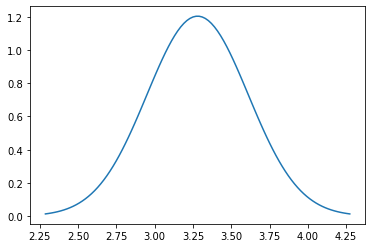

In [7]:
#cost of MMN

mu_mmn = 3.28
#variance = 
#sigma = math.sqrt(variance)
sigma_mmn = (mu_mmn*1.2 - mu_mmn*0.8)/(2*1.98)

x = np.linspace(mu_mmn - 3*sigma_mmn, mu_mmn + 3*sigma_mmn, 100)
plt.plot(x, stats.norm.pdf(x, mu_mmn, sigma_mmn))
plt.show()

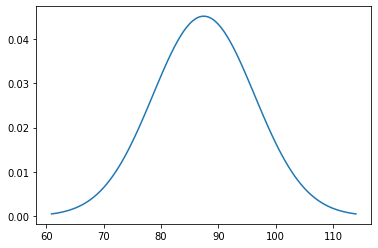

In [8]:
#cost of BEP

mu_bep = 87.45
#variance = 
#sigma = math.sqrt(variance)
sigma_bep = (mu_bep*1.2 - mu_bep*0.8)/(2*1.98)

x = np.linspace(mu_bep - 3*sigma_bep, mu_bep + 3*sigma_bep, 100)
plt.plot(x, stats.norm.pdf(x, mu_bep, sigma_bep))
plt.show()

In [9]:
give_me_an_mmn_cost = np.random.normal(mu_mmn, sigma_mmn, size=100)
print(give_me_an_mmn_cost)
pd.Series(give_me_an_mmn_cost).describe(percentiles = [0.025,0.975])

[3.07353945 2.99442736 3.27572188 3.15454903 3.07907169 2.9813476
 3.04336446 3.22739192 3.02242805 3.0086535  3.63344461 3.84204249
 2.86736521 2.94045466 3.2116545  2.49604183 3.25670061 2.92459406
 3.34821086 3.71627683 2.55753861 3.11135792 2.75121534 3.47806
 3.38294332 3.20243885 3.08658485 3.10230196 3.71791382 3.42943892
 2.54706113 2.92609821 3.49924818 3.50876894 3.15703095 3.45069306
 3.22203293 2.93923304 2.81128966 3.11189023 3.17107224 3.42622984
 2.91545886 3.12819339 3.89212024 3.58220603 3.02284494 3.11617155
 3.0558049  3.21449517 3.43820952 3.41269778 3.43591707 3.17332179
 3.18679836 3.11560296 2.81888447 3.52181743 3.28366979 3.25055464
 3.32738353 3.66325197 3.43963897 3.46976141 3.51464169 3.38719313
 2.90913597 3.39867444 2.93078433 3.34503324 3.61887182 3.10916668
 2.99354848 3.45961451 3.93448239 3.847927   3.74550519 2.77674645
 3.13504177 3.54365897 2.73809002 3.88691631 3.22171762 3.2836376
 3.15348492 3.37465075 3.1438773  3.81206125 3.18877437 3.16796413


count    100.000000
mean       3.237918
std        0.335166
min        2.437484
2.5%       2.520276
50%        3.213075
97.5%      3.868396
max        3.934482
dtype: float64

In [10]:
%cd '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/tanzania/2020_12_18_16_18_26'
%ls

/ihme/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/tanzania/2020_12_18_16_18_26
branches.yaml  keyspace.yaml             output.hdf        settings.py
count_data/    logs/                     __pycache__/
final_data/    model_specification.yaml  requirements.txt


In [11]:
#5a
run_1_output_dirs = ['/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/india/2020_12_18_16_23_36/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/pakistan/2020_12_20_16_30_49/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/mali/2020_12_19_10_29_20/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/tanzania/2020_12_19_10_32_34/count_data/']

#5b
run_2_output_dirs = ['/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/india/2020_12_18_16_04_38/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/pakistan/2020_12_18_16_16_04/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/mali/2020_12_18_16_13_32/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/tanzania/2020_12_18_16_18_26/count_data/']

#location labels
locations = ['India','Pakistan','Mali','Tanzania']

#use in sort_values to make custum sort list. I sorted by region. 
sorter = ['India','Pakistan','Mali','Tanzania']
sorterIndex = dict(zip(sorter,range(len(sorter))))

!whoami
!date


nicoly
Tue Feb 16 02:56:24 PST 2021


In [12]:
def read_count_data(data_file):
    data = pd.DataFrame()
    for i in list(range(0,len(run_1_output_dirs))):
        temp1 = pd.read_hdf(run_1_output_dirs[i] + data_file + '.hdf')
        temp2 = pd.read_hdf(run_2_output_dirs[i] + data_file + '.hdf')
        temp = temp1.append(temp2)
        temp['location'] = locations[i]
        temp['location_rank'] = temp['location'].map(sorterIndex)
        temp = temp.sort_values(by='location_rank')
        temp = temp.drop(columns=['location_rank'])
        data = data.append(temp)
    return data


# READ COUNT DATA FROM HDF

In [13]:
ylls = read_count_data('ylls')
ylds = read_count_data('ylds')
person_time = read_count_data('person_time')
population = read_count_data('population')
deaths = read_count_data('deaths')

# 1. DALYS

total dalys table: overall_result_counts

In [14]:
result_counts = deaths.append(ylls).append(ylds)

# sum across age groups, mother status, cause, treatment group
overall_result_counts = result_counts.groupby(['input_draw','location','scenario','measure']).sum().reset_index()

# calculate dalys
dalys = overall_result_counts.reset_index().loc[overall_result_counts.reset_index().measure.isin(['ylds','ylls'])]

dalys = dalys.groupby(['input_draw','location','scenario']).sum().reset_index().drop(columns='index')
dalys['measure'] = 'dalys'

overall_result_counts = overall_result_counts.append(dalys).set_index(['input_draw','location','measure','scenario']).sort_index()

overall_result_counts.head()

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


value
input_draw location measure scenario                               
3          India    dalys   baseline                  322427.572855
                            bep_ce_scale_up           305820.181320
                            bep_ce_targeted_scale_up  306962.334525
                            bep_hd_scale_up           292526.429446
                            bep_hd_targeted_scale_up  305091.433373

### testing ylls + ylds = dalys

In [15]:
# test that dalys = ylls + ylds

test = overall_result_counts.reset_index()
test_ylls = test.loc[test.measure == 'ylls'].set_index(['input_draw','location','scenario']).drop(columns='measure')
test_deaths = test.loc[test.measure == 'death'].set_index(['input_draw','location','scenario']).drop(columns='measure')
test_ylds = test.loc[test.measure == 'ylds'].set_index(['input_draw','location','scenario']).drop(columns='measure')
test_dalys = test.loc[test.measure == 'dalys'].set_index(['input_draw','location','scenario']).drop(columns='measure')

assert np.all(test_ylls > test_ylds)
assert np.all(test_dalys == test_ylls + test_ylds)
assert np.all(test_ylls > test_deaths)

In [16]:
# sum across age groups, mother status, cause, treatment group

overall_births = population.loc[population.treatment_group == 'all']
overall_births = overall_births.loc[overall_births.measure == 'total_population']
overall_births = overall_births.groupby(['input_draw','location','scenario']).sum()

assert len(overall_births.value.unique()) == 1, "WARNING: number of births not the same in each scenario"
assert overall_births.value.unique()[0] == 100_000, "WARNING: number of births not equal to expected value of 100,000"

overall_births.head()

value
input_draw location scenario                          
3          India    baseline                  100000.0
                    bep_ce_scale_up           100000.0
                    bep_ce_targeted_scale_up  100000.0
                    bep_hd_scale_up           100000.0
                    bep_hd_targeted_scale_up  100000.0

# 2. AVERTED DALYS

### relative to baseline

averted dalys relative to baseline table: averted_counts

In [17]:
# averted counts relative to baseline
baseline_counts = (overall_result_counts.reset_index()
                   .loc[overall_result_counts.reset_index().scenario == 'baseline']
                   .drop(columns='scenario')
                   .set_index(['input_draw','location','measure']))

averted_counts = baseline_counts - overall_result_counts.reset_index().set_index(['input_draw','location','measure','scenario'])
averted_counts.head()

value
input_draw location measure scenario                              
3          India    dalys   baseline                      0.000000
                            bep_ce_scale_up           16607.391535
                            bep_ce_targeted_scale_up  15465.238330
                            bep_hd_scale_up           29901.143409
                            bep_hd_targeted_scale_up  17336.139482

### relative to MMN

averted_rel_mmn_counts

In [18]:
#for mmn_scale_up scenario only

mmn_counts = (overall_result_counts.reset_index()
                   .loc[overall_result_counts.reset_index().scenario == 'mmn_scale_up']
                   .drop(columns='scenario')
                   .set_index(['input_draw','location','measure']))
mmn_counts.head()

value
input_draw location measure               
3          India    dalys    309861.364232
                    death      3523.000000
                    ylds        956.462987
                    ylls     308904.901245
           Mali     dalys    716206.185301

In [19]:
# averted counts relative to mmn
mmn_counts = (overall_result_counts.reset_index()
                   .loc[overall_result_counts.reset_index().scenario == 'mmn_scale_up']
                   .drop(columns='scenario')
                   .set_index(['input_draw','location','measure']))

averted_rel_mmn_counts = mmn_counts - overall_result_counts.reset_index().set_index(['input_draw','location','measure','scenario'])

averted_rel_mmn_counts=averted_rel_mmn_counts.reset_index()
averted_rel_mmn_counts=averted_rel_mmn_counts[averted_rel_mmn_counts['scenario'] != 'baseline'].set_index(['input_draw','location','measure','scenario'])

#averted_rel_mmn_counts = averted_rel_mmn_counts.query('scenario' != 'baseline')
#NEED TO FIGURE OUT A BETTER WAY TO DROP BASELINE ROW

averted_rel_mmn_counts.head(10)


value
input_draw location measure scenario                              
3          India    dalys   bep_ce_scale_up            4041.182912
                            bep_ce_targeted_scale_up   2899.029707
                            bep_hd_scale_up           17334.934786
                            bep_hd_targeted_scale_up   4769.930858
                            mmn_scale_up                  0.000000
                    death   bep_ce_scale_up              46.000000
                            bep_ce_targeted_scale_up     33.000000
                            bep_hd_scale_up             196.000000
                            bep_hd_targeted_scale_up     54.000000
                            mmn_scale_up                  0.000000

# 3. Number treated/supplemented counts 

treatment_counts

In [20]:
treatment_counts = population.loc[population.treatment_group != 'all']
treatment_counts = treatment_counts.groupby(['input_draw','location','scenario','treatment_group']).sum()

assert treatment_counts.groupby(['input_draw','location','scenario']).sum().value.unique()[0] == 100_000, "ERROR: sum of treatment counts across input draws and scenario does not equal expected value of 100,000 for all scenarios/draws"

treatment_counts.head()

value
input_draw location scenario        treatment_group         
3          India    baseline        bep                  0.0
                                    ifa              35192.0
                                    mmn                  0.0
                                    none             64808.0
                    bep_ce_scale_up bep              79789.0

# 4. Treatment cost per scenario

cost

In [21]:
# make cost per treatment dataframe


input_draws = treatment_counts.reset_index()['input_draw'].unique()

np.random.seed(12345)
ifa_cost = pd.DataFrame()
ifa_cost['input_draw'] = input_draws
ifa_cost['value'] = np.random.normal(mu_ifa, sigma_ifa, size=len(ifa_cost))
ifa_cost['treatment_group'] = 'ifa'

np.random.seed(12345)
mmn_cost = pd.DataFrame()
mmn_cost['input_draw'] = input_draws
mmn_cost['value'] = np.random.normal(mu_mmn, sigma_mmn, size=len(mmn_cost))
mmn_cost['treatment_group'] = 'mmn'

np.random.seed(12345)
bep_cost = pd.DataFrame()
bep_cost['input_draw'] = input_draws
bep_cost['value'] = np.random.normal(mu_bep, sigma_bep, size=len(bep_cost)) #cost of bep has MMN inside the formula
bep_cost['treatment_group'] = 'bep'

none_cost = pd.DataFrame()
none_cost['input_draw'] = input_draws
none_cost['value'] = 0
none_cost['treatment_group'] = 'none'

costs = ifa_cost.append(mmn_cost).append(bep_cost).append(none_cost).set_index(['input_draw','treatment_group'])
costs.head()

,,value
input_draw,treatment_group,
3,ifa,2.673550
8,ifa,2.862072
21,ifa,2.586761
29,ifa,2.576753
35,ifa,3.272079


## overall costs per scenario

overall_costs

In [22]:
treatment_counts.reset_index().set_index(['input_draw','treatment_group','location','scenario']).head()

value
input_draw treatment_group location scenario                
3          bep             India    baseline             0.0
           ifa             India    baseline         35192.0
           mmn             India    baseline             0.0
           none            India    baseline         64808.0
           bep             India    bep_ce_scale_up  79789.0

In [23]:
overall_costs = treatment_counts.reset_index().set_index(['input_draw','treatment_group','location','scenario']) * costs
overall_costs = overall_costs.reset_index().groupby(['input_draw','location','scenario']).sum()
overall_costs.head()

value
input_draw location scenario                              
3          India    baseline                  9.408758e+04
                    bep_ce_scale_up           6.833270e+06
                    bep_ce_targeted_scale_up  1.367859e+06
                    bep_hd_scale_up           6.833270e+06
                    bep_hd_targeted_scale_up  1.367859e+06

In [24]:
# check ordering of costs for scenarios
test = overall_costs.reset_index()
test_baseline = test.loc[test.scenario == 'baseline'].drop(columns='scenario').set_index(['input_draw','location'])
test_mmn = test.loc[test.scenario == 'mmn_scale_up'].drop(columns='scenario').set_index(['input_draw','location'])
test_bep_ce_scale_up = test.loc[test.scenario == 'bep_ce_scale_up'].drop(columns='scenario').set_index(['input_draw','location'])
test_bep_ce_targeted_scale_up = test.loc[test.scenario == 'bep_ce_targeted_scale_up'].drop(columns='scenario').set_index(['input_draw','location'])
test_bep_hd_scale_up = test.loc[test.scenario == 'bep_hd_scale_up'].drop(columns='scenario').set_index(['input_draw','location'])
test_bep_hd_targeted_scale_up = test.loc[test.scenario == 'bep_hd_targeted_scale_up'].drop(columns='scenario').set_index(['input_draw','location'])

assert np.all(test_baseline < test_mmn)
assert np.all(test_mmn < test_bep_ce_targeted_scale_up)
assert np.all(test_bep_ce_targeted_scale_up < test_bep_ce_scale_up)
assert np.all(test_bep_ce_targeted_scale_up == test_bep_hd_targeted_scale_up)
assert np.all(test_bep_ce_scale_up == test_bep_hd_scale_up)

# 5. COST DIFFERENCE

In [25]:
baseline_costs = (overall_costs.reset_index()
                  .loc[overall_costs.reset_index().scenario == 'baseline']
                  .drop(columns='scenario')
                  .set_index(['input_draw','location']))
incremental_costs = overall_costs - baseline_costs
incremental_costs.head()

value
input_draw location scenario                              
3          India    baseline                  0.000000e+00
                    bep_ce_scale_up           6.739182e+06
                    bep_ce_targeted_scale_up  1.273772e+06
                    bep_hd_scale_up           6.739182e+06
                    bep_hd_targeted_scale_up  1.273772e+06

# 6. ICERS !!!!!!!!

icers_summarized

In [26]:
icers = incremental_costs / averted_counts.reset_index().set_index(['input_draw','location','scenario','measure'])
icers_summarized = icers.groupby(['location','scenario','measure']).describe(percentiles=[0.025,0.975])
icers_summarized = icers_summarized.reset_index().loc[icers_summarized.reset_index().scenario != 'baseline'].loc[icers_summarized.reset_index().measure == 'dalys']
icers_summarized.head()

location                  scenario measure  value                         \
                                               count        mean        std   
4     India           bep_ce_scale_up   dalys  100.0  395.632273  96.211048   
8     India  bep_ce_targeted_scale_up   dalys  100.0   81.918789  15.685299   
12    India           bep_hd_scale_up   dalys  100.0  229.763758  39.559053   
16    India  bep_hd_targeted_scale_up   dalys  100.0   69.061068  11.478051   
20    India              mmn_scale_up   dalys  100.0   13.041705   3.154489   

                                                                
           min        2.5%         50%       97.5%         max  
4   230.000073  253.464333  379.800181  612.275715  776.631850  
8    47.192547   56.389597   79.274325  114.939440  134.958084  
12  138.854899  161.030418  227.268949  313.227916  335.978396  
16   43.287113   49.492349   67.382537   95.425375  100.788109  
20    7.007375    7.716327   12.681141   19.731596   22.288824

# PLOT 1

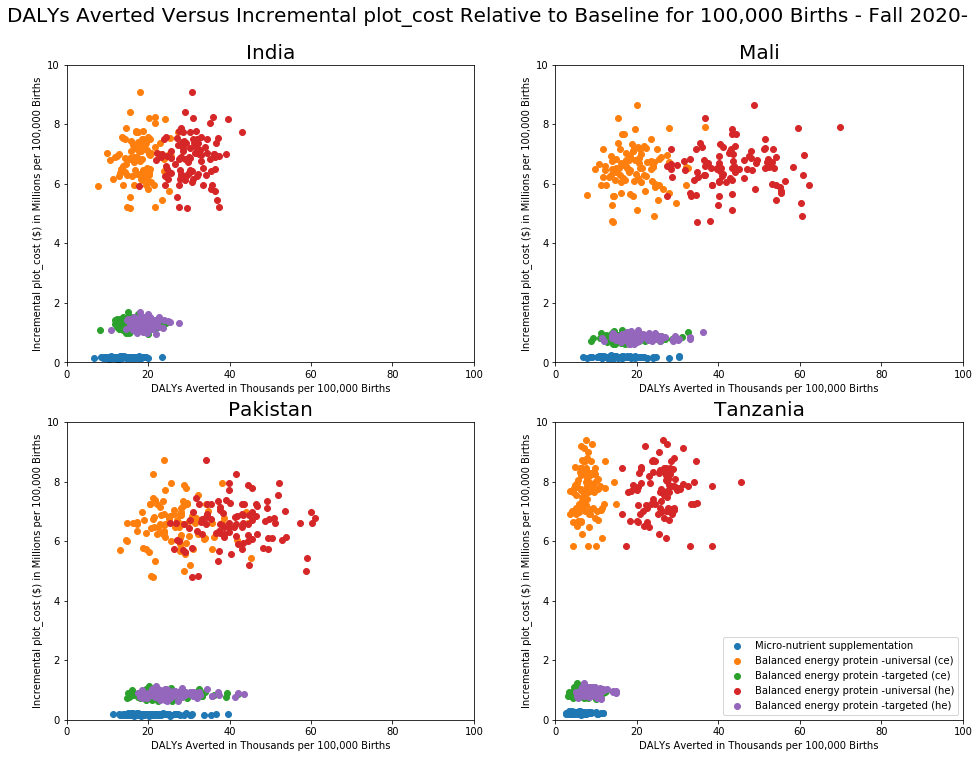

In [27]:
fig, axs = plt.subplots(2,2)

plot_dalys = averted_counts.reset_index()
plot_dalys = plot_dalys.loc[plot_dalys.scenario != 'baseline'].loc[plot_dalys.measure == 'dalys']
plot_dalys['value'] = plot_dalys['value'] / 1_000

plot_cost = incremental_costs.reset_index()
plot_cost = plot_cost.loc[plot_cost.scenario != 'baseline']
plot_cost['value'] = plot_cost['value'] / 1_000_000

ylim = 10
xlim = 100

scenarios = ['mmn_scale_up',
             'bep_ce_scale_up', 
             'bep_ce_targeted_scale_up',
             'bep_hd_scale_up',
             'bep_hd_targeted_scale_up']

scenarios_names = ['Micro-nutrient supplementation',
                   'Balanced energy protein -universal (ce)', 
                   'Balanced energy protein -targeted (ce)',
                   'Balanced energy protein -universal (he)',
                   'Balanced energy protein -targeted (he)']

location = 'India'
for scenario in scenarios:
    axs[0,0].scatter(plot_dalys.loc[plot_dalys.location == location].loc[plot_dalys.scenario == scenario]['value'].values,
                 plot_cost.loc[plot_cost.location == location].loc[plot_cost.scenario == scenario]['value'].values)
axs[0,0].set_title(location,fontsize=20)
axs[0,0].set_ylim(0,ylim)
axs[0,0].set_xlim(0,xlim)
    
location = 'Mali'
for scenario in scenarios:
    axs[0,1].scatter(plot_dalys.loc[plot_dalys.location == location].loc[plot_dalys.scenario == scenario]['value'].values,
                 plot_cost.loc[plot_cost.location == location].loc[plot_cost.scenario == scenario]['value'].values)
axs[0,1].set_title(location,fontsize=20)
axs[0,1].set_ylim(0,ylim)
axs[0,1].set_xlim(0,xlim)
    
location = 'Pakistan'
for scenario in scenarios:
    axs[1,0].scatter(plot_dalys.loc[plot_dalys.location == location].loc[plot_dalys.scenario == scenario]['value'].values,
                 plot_cost.loc[plot_cost.location == location].loc[plot_cost.scenario == scenario]['value'].values)
axs[1,0].set_title(location,fontsize=20)
axs[1,0].set_ylim(0,ylim)
axs[1,0].set_xlim(0,xlim)
    
location = 'Tanzania'
for scenario in scenarios:
    axs[1,1].scatter(plot_dalys.loc[plot_dalys.location == location].loc[plot_dalys.scenario == scenario]['value'].values,
                 plot_cost.loc[plot_cost.location == location].loc[plot_cost.scenario == scenario]['value'].values)
axs[1,1].set_title(location,fontsize=20)
axs[1,1].set_ylim(0,ylim)
axs[1,1].set_xlim(0,xlim)

for ax in axs.flat:
    ax.set(xlabel='DALYs Averted in Thousands per 100,000 Births', 
           ylabel='Incremental plot_cost ($) in Millions per 100,000 Births')
    
plt.legend(scenarios_names)
plt.suptitle('DALYs Averted Versus Incremental plot_cost Relative to Baseline for 100,000 Births - Fall 2020-',x=1.1,y=2.6,fontsize=20)
plt.subplots_adjust(right=2.2, top=2.4)

# PLOT 2

Text(0.5, 1.0, 'DALYs in Thousands per 100,000 Births - FALL 2020 -')

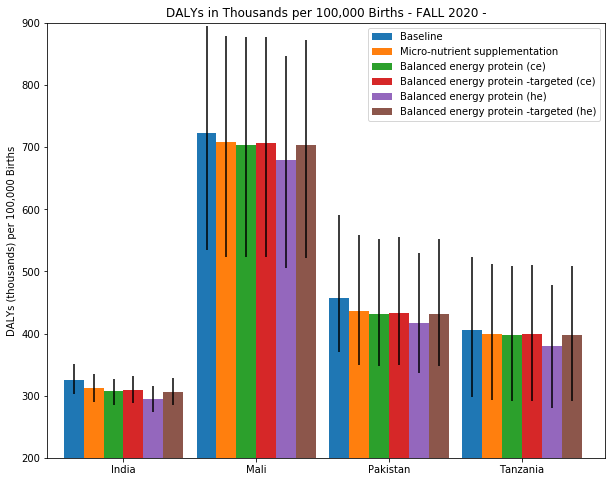

In [28]:
data = overall_result_counts.reset_index()
data = data.loc[data.measure == 'dalys']
data = data.groupby(['location','scenario']).describe(percentiles=[0.025,0.975]).reset_index()
data['value'] = data['value'] / 1_000

# bar width
barWidth = 0.15
w = 0.15

scenarios = ['baseline',
             'mmn_scale_up',
             'bep_ce_scale_up', 
             'bep_ce_targeted_scale_up',
             'bep_hd_scale_up',
             'bep_hd_targeted_scale_up']

scenarios_names = ['Baseline',
                   'Micro-nutrient supplementation',
                   'Balanced energy protein (ce)', 
                   'Balanced energy protein -targeted (ce)',
                   'Balanced energy protein (he)',
                   'Balanced energy protein -targeted (he)']
             

mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
upper_1 = data.loc[data.scenario == scenarios[0]]['value','max'].values - data.loc[data.scenario == scenarios[0]]['value','mean'].values 
lower_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values - data.loc[data.scenario == scenarios[0]]['value','min'].values 

mean_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values
upper_2 = data.loc[data.scenario == scenarios[1]]['value','max'].values - data.loc[data.scenario == scenarios[1]]['value','mean'].values 
lower_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values - data.loc[data.scenario == scenarios[1]]['value','min'].values 

mean_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values
upper_3 = data.loc[data.scenario == scenarios[2]]['value','max'].values - data.loc[data.scenario == scenarios[2]]['value','mean'].values 
lower_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values - data.loc[data.scenario == scenarios[2]]['value','min'].values 

mean_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values
upper_4 = data.loc[data.scenario == scenarios[3]]['value','max'].values - data.loc[data.scenario == scenarios[3]]['value','mean'].values 
lower_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values - data.loc[data.scenario == scenarios[3]]['value','min'].values 

mean_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values
upper_5 = data.loc[data.scenario == scenarios[4]]['value','max'].values - data.loc[data.scenario == scenarios[4]]['value','mean'].values 
lower_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values - data.loc[data.scenario == scenarios[4]]['value','min'].values 

mean_6 = data.loc[data.scenario == scenarios[5]]['value','mean'].values
upper_6 = data.loc[data.scenario == scenarios[5]]['value','max'].values - data.loc[data.scenario == scenarios[5]]['value','mean'].values 
lower_6 = data.loc[data.scenario == scenarios[5]]['value','mean'].values - data.loc[data.scenario == scenarios[5]]['value','min'].values 

# plot
plt.figure(figsize=(10,8))

a = np.arange(len(mean_1))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
e = [x + barWidth for x in d]
f = [x + barWidth for x in e]

plt.bar(a, mean_1, yerr=[lower_1, upper_1], width=barWidth)
plt.bar(b, mean_2, yerr=[lower_2, upper_2], width=barWidth)
plt.bar(c, mean_3, yerr=[lower_3, upper_3], width=barWidth)
plt.bar(d, mean_4, yerr=[lower_4, upper_4], width=barWidth)
plt.bar(e, mean_5, yerr=[lower_5, upper_5], width=barWidth)
plt.bar(f, mean_6, yerr=[lower_6, upper_6], width=barWidth)

plt.yticks([200,300,400,500,600,700,800,900,1000],[200,300,400,500,600,700,800,900,1000])
plt.legend(scenarios_names)
plt.xticks([r + 2.5*barWidth for r in range(len(mean_1))], data.location.unique())

plt.axis([-0.2 , 4 , 200, 900])
plt.ylabel('DALYs (thousands) per 100,000 Births')
plt.title('DALYs in Thousands per 100,000 Births - FALL 2020 -')
#scenarios[1]

# PLOT 3

In [29]:
averted_counts.head()

value
input_draw location measure scenario                              
3          India    dalys   baseline                      0.000000
                            bep_ce_scale_up           16607.391535
                            bep_ce_targeted_scale_up  15465.238330
                            bep_hd_scale_up           29901.143409
                            bep_hd_targeted_scale_up  17336.139482

In [30]:
data = averted_counts.reset_index()
data = data.loc[data.measure == 'dalys']
data = data.groupby(['location','scenario']).describe(percentiles=[0.025,0.975]).reset_index()

mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
mean_1

array([0., 0., 0., 0.])

Text(0.5, 1.0, 'DALYs averted in Thousands per 100,000 Births - FALL 2020 -')

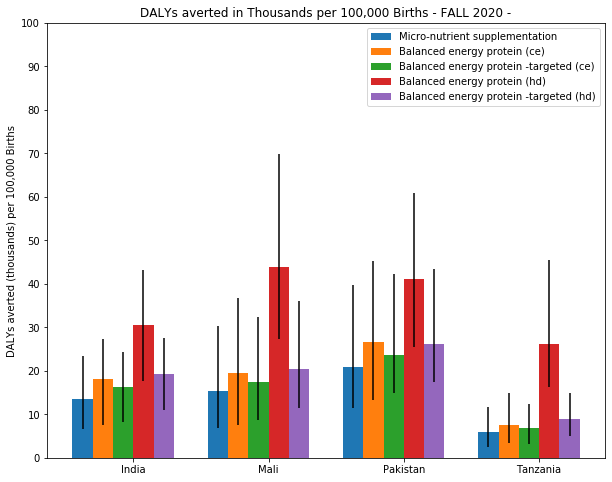

In [31]:
data = averted_counts.reset_index()
data = data.loc[data.measure == 'dalys']
data = data.groupby(['location','scenario']).describe(percentiles=[0.025,0.975]).reset_index()
data['value'] = data['value'] / 1_000

# bar width
barWidth = 0.15
w = 0.15

scenarios = ['mmn_scale_up',
             'bep_ce_scale_up', 
             'bep_ce_targeted_scale_up',
             'bep_hd_scale_up',
             'bep_hd_targeted_scale_up']

scenarios_names = ['Micro-nutrient supplementation',
                   'Balanced energy protein (ce)', 
                   'Balanced energy protein -targeted (ce)',
                   'Balanced energy protein (hd)',
                   'Balanced energy protein -targeted (hd)']
             
             
mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
upper_1 = data.loc[data.scenario == scenarios[0]]['value','max'].values - data.loc[data.scenario == scenarios[0]]['value','mean'].values 
lower_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values - data.loc[data.scenario == scenarios[0]]['value','min'].values 

mean_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values
upper_2 = data.loc[data.scenario == scenarios[1]]['value','max'].values - data.loc[data.scenario == scenarios[1]]['value','mean'].values 
lower_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values - data.loc[data.scenario == scenarios[1]]['value','min'].values 

mean_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values
upper_3 = data.loc[data.scenario == scenarios[2]]['value','max'].values - data.loc[data.scenario == scenarios[2]]['value','mean'].values 
lower_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values - data.loc[data.scenario == scenarios[2]]['value','min'].values 

mean_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values
upper_4 = data.loc[data.scenario == scenarios[3]]['value','max'].values - data.loc[data.scenario == scenarios[3]]['value','mean'].values 
lower_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values - data.loc[data.scenario == scenarios[3]]['value','min'].values 

mean_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values
upper_5 = data.loc[data.scenario == scenarios[4]]['value','max'].values - data.loc[data.scenario == scenarios[4]]['value','mean'].values 
lower_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values - data.loc[data.scenario == scenarios[4]]['value','min'].values 

# plot
plt.figure(figsize=(10,8))

a = np.arange(len(mean_1))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
e = [x + barWidth for x in d]
f = [x + barWidth for x in e]

plt.bar(a, mean_1, yerr=[lower_1, upper_1], width=barWidth)
plt.bar(b, mean_2, yerr=[lower_2, upper_2], width=barWidth)
plt.bar(c, mean_3, yerr=[lower_3, upper_3], width=barWidth)
plt.bar(d, mean_4, yerr=[lower_4, upper_4], width=barWidth)
plt.bar(e, mean_5, yerr=[lower_5, upper_5], width=barWidth)


plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.legend(scenarios_names)
plt.xticks([r + 2.5*barWidth for r in range(len(mean_1))], data.location.unique())

#plt.axis([-0.2 , 4 , 200, 900])
plt.ylabel('DALYs averted (thousands) per 100,000 Births')
plt.title('DALYs averted in Thousands per 100,000 Births - FALL 2020 -')
#scenarios[1]

In [32]:
# LOOKS LIKE THE ERROR BARS WERE UPSIDE DOWN IN NICOLE'S NOTEBOOK
data.loc[data.location=='Mali'].loc[data.scenario=='baseline']['value']

# see that the max value for mali baseline is almost 900, not the case for nicole's plot

### WE CORRECTED FOR THIS!!! :) :) :) :)

,count,mean,std,min,2.5%,50%,97.5%,max
6,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PLOT 4

Text(0.5, 1.0, 'Incrememntal Cost Effectiveness Ratio (ICER) - FALL 2020 -')

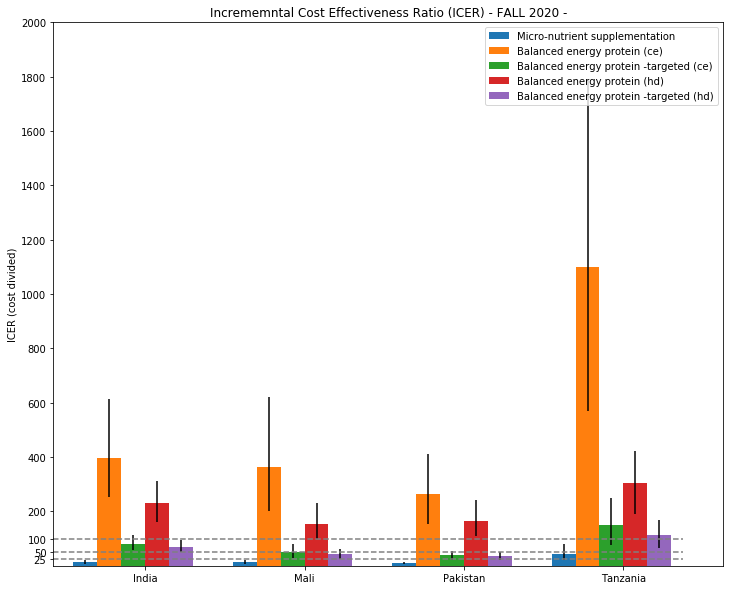

In [33]:
data = icers_summarized.reset_index()

# bar width
barWidth = 0.15
w = 0.15

scenarios = ['mmn_scale_up',
             'bep_ce_scale_up', 
             'bep_ce_targeted_scale_up',
             'bep_hd_scale_up',
             'bep_hd_targeted_scale_up']

scenarios_names = ['Micro-nutrient supplementation',
                   'Balanced energy protein (ce)', 
                   'Balanced energy protein -targeted (ce)',
                   'Balanced energy protein (hd)',
                   'Balanced energy protein -targeted (hd)']
             

mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
upper_1 = data.loc[data.scenario == scenarios[0]]['value','97.5%'].values - data.loc[data.scenario == scenarios[0]]['value','mean'].values 
lower_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values - data.loc[data.scenario == scenarios[0]]['value','2.5%'].values 

mean_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values
upper_2 = data.loc[data.scenario == scenarios[1]]['value','97.5%'].values - data.loc[data.scenario == scenarios[1]]['value','mean'].values 
lower_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values - data.loc[data.scenario == scenarios[1]]['value','2.5%'].values 

mean_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values
upper_3 = data.loc[data.scenario == scenarios[2]]['value','97.5%'].values - data.loc[data.scenario == scenarios[2]]['value','mean'].values 
lower_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values - data.loc[data.scenario == scenarios[2]]['value','2.5%'].values 

mean_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values
upper_4 = data.loc[data.scenario == scenarios[3]]['value','97.5%'].values - data.loc[data.scenario == scenarios[3]]['value','mean'].values 
lower_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values - data.loc[data.scenario == scenarios[3]]['value','2.5%'].values 

mean_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values
upper_5 = data.loc[data.scenario == scenarios[4]]['value','97.5%'].values - data.loc[data.scenario == scenarios[4]]['value','mean'].values 
lower_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values - data.loc[data.scenario == scenarios[4]]['value','2.5%'].values 

a = np.arange(len(mean_1))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
e = [x + barWidth for x in d]
f = [x + barWidth for x in e]

plt.figure(figsize=(12,10))

plt.bar(a, mean_1, yerr=[lower_1, upper_1], width=barWidth)
plt.bar(b, mean_2, yerr=[lower_2, upper_2], width=barWidth)
plt.bar(c, mean_3, yerr=[lower_3, upper_3], width=barWidth)
plt.bar(d, mean_4, yerr=[lower_4, upper_4], width=barWidth)
plt.bar(e, mean_5, yerr=[lower_5, upper_5], width=barWidth)

plt.legend(scenarios_names)

threshold = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(a)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold3, threshold3],'k--', c='gray')

plt.xticks([r + 2.5*barWidth for r in range(len(mean_1))], data.location.unique())
plt.axis([-0.2 , 4 , 0, 1000])
plt.yticks([25,50,100,200,400,600,800,1000,1200,1400,1600,1800,2000])
#plt.yscale('log')
plt.ylabel('ICER (cost divided)')
plt.title('Incrememntal Cost Effectiveness Ratio (ICER) - FALL 2020 -')

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


Text(0.5, 1.0, 'Incremental Cost Effectiveness Ratio (ICER) logscale - FALL 2020 -')

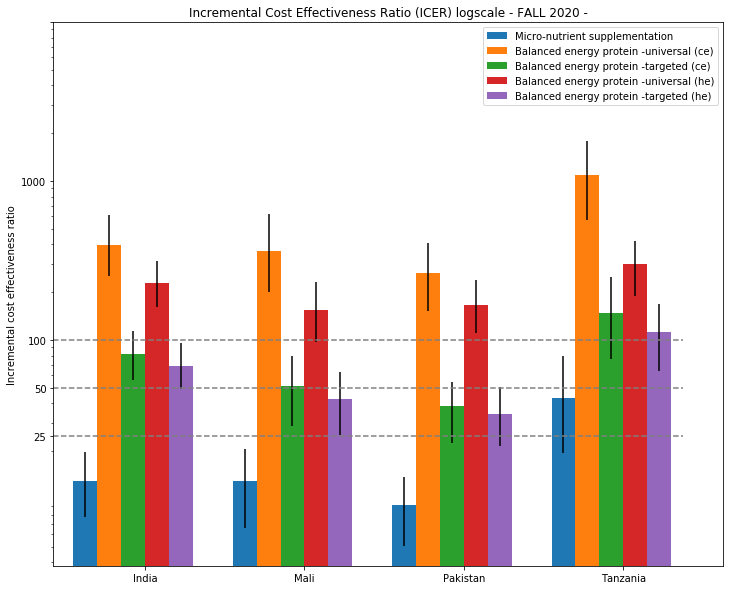

In [34]:
#LOG SCALE

data = icers_summarized.reset_index()

# bar width
barWidth = 0.15
w = 0.15

scenarios = ['mmn_scale_up',
             'bep_ce_scale_up', 
             'bep_ce_targeted_scale_up',
             'bep_hd_scale_up',
             'bep_hd_targeted_scale_up']

scenarios_names = ['Micro-nutrient supplementation',
                   'Balanced energy protein -universal (ce)', 
                   'Balanced energy protein -targeted (ce)',
                   'Balanced energy protein -universal (he)',
                   'Balanced energy protein -targeted (he)']
             

mean_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values
upper_1 = data.loc[data.scenario == scenarios[0]]['value','97.5%'].values - data.loc[data.scenario == scenarios[0]]['value','mean'].values 
lower_1 = data.loc[data.scenario == scenarios[0]]['value','mean'].values - data.loc[data.scenario == scenarios[0]]['value','2.5%'].values 

mean_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values
upper_2 = data.loc[data.scenario == scenarios[1]]['value','97.5%'].values - data.loc[data.scenario == scenarios[1]]['value','mean'].values 
lower_2 = data.loc[data.scenario == scenarios[1]]['value','mean'].values - data.loc[data.scenario == scenarios[1]]['value','2.5%'].values 

mean_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values
upper_3 = data.loc[data.scenario == scenarios[2]]['value','97.5%'].values - data.loc[data.scenario == scenarios[2]]['value','mean'].values 
lower_3 = data.loc[data.scenario == scenarios[2]]['value','mean'].values - data.loc[data.scenario == scenarios[2]]['value','2.5%'].values 

mean_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values
upper_4 = data.loc[data.scenario == scenarios[3]]['value','97.5%'].values - data.loc[data.scenario == scenarios[3]]['value','mean'].values 
lower_4 = data.loc[data.scenario == scenarios[3]]['value','mean'].values - data.loc[data.scenario == scenarios[3]]['value','2.5%'].values 

mean_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values
upper_5 = data.loc[data.scenario == scenarios[4]]['value','97.5%'].values - data.loc[data.scenario == scenarios[4]]['value','mean'].values 
lower_5 = data.loc[data.scenario == scenarios[4]]['value','mean'].values - data.loc[data.scenario == scenarios[4]]['value','2.5%'].values 

a = np.arange(len(mean_1))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
e = [x + barWidth for x in d]
f = [x + barWidth for x in e]

plt.figure(figsize=(12, 10))

plt.bar(a, mean_1, yerr=[lower_1, upper_1], width=barWidth)
plt.bar(b, mean_2, yerr=[lower_2, upper_2], width=barWidth)
plt.bar(c, mean_3, yerr=[lower_3, upper_3], width=barWidth)
plt.bar(d, mean_4, yerr=[lower_4, upper_4], width=barWidth)
plt.bar(e, mean_5, yerr=[lower_5, upper_5], width=barWidth)

plt.legend(scenarios_names)

threshold = 100
threshold2 = 50
threshold3 = 25

plt.plot([-0.25,len(a)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(a)-.25], [threshold3, threshold3],'k--', c='gray')

plt.xticks([r + 2.5*barWidth for r in range(len(mean_1))], data.location.unique())
plt.yscale('log')
plt.axis([-0.2 , 4 , 0, 1000])
plt.yticks([25,50,100,1000,10000],[25,50,100,1000]) #first argument says WHERE to put the ticks, second argument says where to put there. 

#plt.yscale('log')
plt.ylabel('Incremental cost effectiveness ratio')
plt.title('Incremental Cost Effectiveness Ratio (ICER) logscale - FALL 2020 -')

In [35]:
icers_summarized.head()

location                  scenario measure  value                         \
                                               count        mean        std   
4     India           bep_ce_scale_up   dalys  100.0  395.632273  96.211048   
8     India  bep_ce_targeted_scale_up   dalys  100.0   81.918789  15.685299   
12    India           bep_hd_scale_up   dalys  100.0  229.763758  39.559053   
16    India  bep_hd_targeted_scale_up   dalys  100.0   69.061068  11.478051   
20    India              mmn_scale_up   dalys  100.0   13.041705   3.154489   

                                                                
           min        2.5%         50%       97.5%         max  
4   230.000073  253.464333  379.800181  612.275715  776.631850  
8    47.192547   56.389597   79.274325  114.939440  134.958084  
12  138.854899  161.030418  227.268949  313.227916  335.978396  
16   43.287113   49.492349   67.382537   95.425375  100.788109  
20    7.007375    7.716327   12.681141   19.731596   22.288824

# -----------------------------------------------------------------------

# TABLES

# COLUMN DALYS

In [36]:
overall_result_counts.head()

value
input_draw location measure scenario                               
3          India    dalys   baseline                  322427.572855
                            bep_ce_scale_up           305820.181320
                            bep_ce_targeted_scale_up  306962.334525
                            bep_hd_scale_up           292526.429446
                            bep_hd_targeted_scale_up  305091.433373

In [37]:
overall_result_counts.reset_index().measure.unique()

array(['dalys', 'death', 'ylds', 'ylls'], dtype=object)

In [38]:
#prepping data

dalys_total = overall_result_counts.reset_index()
dalys_total = dalys_total[dalys_total['measure'] == 'dalys'].set_index(['input_draw','location','scenario','measure']) #select for rows containing 'dalys' in column 'measure'
dalys_total = dalys_total.groupby(['location','scenario','measure']).describe(percentiles=[0.025,0.975]).reset_index()

#to sort by region (india, pakistan, mali, tanzania)
dalys_total['location_rank'] = dalys_total['location'].map(sorterIndex)
dalys_total = dalys_total.sort_values(by='location_rank')
dalys_total['location_rank'] = dalys_total['location_rank'].replace({0 : 'india', 1 : 'pakistan', 2 : 'mali', 3 : 'tanzania' })

dalys_total.head()

location                  scenario measure  value                 \
                                              count           mean   
0    India                  baseline   dalys  100.0  325266.498191   
1    India           bep_ce_scale_up   dalys  100.0  307116.320728   
2    India  bep_ce_targeted_scale_up   dalys  100.0  308963.088354   
3    India           bep_hd_scale_up   dalys  100.0  294743.384535   
4    India  bep_hd_targeted_scale_up   dalys  100.0  306097.394237   

                                                                            \
           std            min           2.5%            50%          97.5%   
0  9836.158768  303413.466126  307229.320381  326817.873626  344889.138961   
1  9911.264882  285577.719606  290428.748074  307933.348797  326073.653483   
2  9862.009733  287552.792858  291117.719891  309682.521993  327178.796989   
3  9803.409915  273573.239837  279203.827108  295859.763812  314329.377445   
4  9762.782924  284964.589307  288095.549844  306523.721378  324325.489047   

                 location_rank  
             max                
0  351516.964422         india  
1  326735.993730         india  
2  330872.250728         india  
3  315357.025927         india  
4  328272.174565         india

In [39]:
#TABLE

results_dalys_total = pd.DataFrame.copy(dalys_total)
results_dalys_total['print'] = (results_dalys_total['value','mean'].round().astype(str) 
                          + ' (' 
                          + results_dalys_total['value','2.5%'].round().astype(str) 
                          + ', '
                          + results_dalys_total['value','97.5%'].round().astype(str) 
                          + ')')

results_dalys_total = pd.pivot_table(results_dalys_total, 
                               index='location_rank',
                              columns='scenario',
                              values='print', aggfunc=lambda x: ' '.join(x))

results_dalys_total = results_dalys_total.T.reset_index()

results_dalys_total

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


location_rank,level_0,scenario,india,mali,pakistan,tanzania
0,,baseline,"325266.0 (307229.0, 344889.0)","723566.0 (600769.0, 873487.0)","457450.0 (376270.0, 544312.0)","405973.0 (321665.0, 486188.0)"
1,,bep_ce_scale_up,"307116.0 (290429.0, 326074.0)","704152.0 (584076.0, 849985.0)","430904.0 (358003.0, 517408.0)","398347.0 (314745.0, 478205.0)"
2,,bep_ce_targeted_scale_up,"308963.0 (291118.0, 327179.0)","706220.0 (585945.0, 853501.0)","433819.0 (360031.0, 521704.0)","399082.0 (315123.0, 479597.0)"
3,,bep_hd_scale_up,"294743.0 (279204.0, 314329.0)","679639.0 (562986.0, 819371.0)","416278.0 (345227.0, 497399.0)","379727.0 (300189.0, 455586.0)"
4,,bep_hd_targeted_scale_up,"306097.0 (288096.0, 324325.0)","703056.0 (582733.0, 849844.0)","431322.0 (357793.0, 518172.0)","397085.0 (313575.0, 477118.0)"
5,,mmn_scale_up,"311801.0 (292267.0, 330137.0)","708278.0 (587124.0, 856911.0)","436581.0 (361938.0, 524402.0)","399987.0 (315354.0, 481170.0)"


# COLUMN DALYS averted 

### column 1a: relative to baseline

In [40]:
averted_counts.head()

value
input_draw location measure scenario                              
3          India    dalys   baseline                      0.000000
                            bep_ce_scale_up           16607.391535
                            bep_ce_targeted_scale_up  15465.238330
                            bep_hd_scale_up           29901.143409
                            bep_hd_targeted_scale_up  17336.139482

In [41]:
averted_counts.reset_index().measure.unique()

array(['dalys', 'death', 'ylds', 'ylls'], dtype=object)

In [42]:
#prepping data

dalys_averted_rel_baseline = averted_counts.reset_index()
dalys_averted_rel_baseline = dalys_averted_rel_baseline[dalys_averted_rel_baseline['measure'] == 'dalys'].set_index(['input_draw','location','scenario','measure']) #select for rows containing 'dalys' in column 'measure'
dalys_averted_rel_baseline = dalys_averted_rel_baseline.groupby(['location','scenario','measure']).describe(percentiles=[0.025,0.975]).reset_index()

#to sort by region (india, pakistan, mali, tanzania)
dalys_averted_rel_baseline['location_rank'] = dalys_averted_rel_baseline['location'].map(sorterIndex)
dalys_averted_rel_baseline = dalys_averted_rel_baseline.sort_values(by='location_rank')
dalys_averted_rel_baseline['location_rank'] = dalys_averted_rel_baseline['location_rank'].replace({0 : 'india', 1 : 'pakistan', 2 : 'mali', 3 : 'tanzania' })

dalys_averted_rel_baseline.head()

location                  scenario measure  value                \
                                              count          mean   
0    India                  baseline   dalys  100.0      0.000000   
1    India           bep_ce_scale_up   dalys  100.0  18150.177463   
2    India  bep_ce_targeted_scale_up   dalys  100.0  16303.409837   
3    India           bep_hd_scale_up   dalys  100.0  30523.113657   
4    India  bep_hd_targeted_scale_up   dalys  100.0  19169.103954   

                                                                        \
           std           min          2.5%           50%         97.5%   
0     0.000000      0.000000      0.000000      0.000000      0.000000   
1  3710.603249   7644.089003  11047.852283  18188.829441  25311.535337   
2  2686.392771   8171.083267  11986.226272  16162.697358  21970.063427   
3  4456.598994  17669.716421  22619.090478  30326.931245  38429.209083   
4  2575.463396  10941.308005  14947.008206  18979.840152  24449.675870   

                location_rank  
            max                
0      0.000000         india  
1  27410.510718         india  
2  24339.570053         india  
3  43129.171616         india  
4  27531.023336         india

In [43]:
#TABLE

results_dalys_averted_rel_baseline = pd.DataFrame.copy(dalys_averted_rel_baseline)
results_dalys_averted_rel_baseline['print'] = (results_dalys_averted_rel_baseline['value','mean'].round().astype(str) 
                          + ' (' 
                          + results_dalys_averted_rel_baseline['value','2.5%'].round().astype(str) 
                          + ', '
                          + results_dalys_averted_rel_baseline['value','97.5%'].round().astype(str) 
                          + ')')

results_dalys_averted_rel_baseline = pd.pivot_table(results_dalys_averted_rel_baseline, 
                               index='location_rank',
                              columns='scenario',
                              values='print', aggfunc=lambda x: ' '.join(x))

results_dalys_averted_rel_baseline = results_dalys_averted_rel_baseline.T.reset_index()

results_dalys_averted_rel_baseline

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


location_rank,level_0,scenario,india,mali,pakistan,tanzania
0,,baseline,"0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)"
1,,bep_ce_scale_up,"18150.0 (11048.0, 25312.0)","19413.0 (10927.0, 32040.0)","26546.0 (14891.0, 42931.0)","7626.0 (4127.0, 12131.0)"
2,,bep_ce_targeted_scale_up,"16303.0 (11986.0, 21970.0)","17346.0 (10935.0, 27818.0)","23631.0 (15461.0, 37768.0)","6891.0 (3552.0, 11951.0)"
3,,bep_hd_scale_up,"30523.0 (22619.0, 38429.0)","43927.0 (28338.0, 60855.0)","41172.0 (26956.0, 59632.0)","26246.0 (17547.0, 36675.0)"
4,,bep_hd_targeted_scale_up,"19169.0 (14947.0, 24450.0)","20510.0 (13937.0, 31765.0)","26128.0 (18205.0, 39481.0)","8889.0 (5363.0, 14375.0)"
5,,mmn_scale_up,"13466.0 (9045.0, 19421.0)","15288.0 (8609.0, 26275.0)","20869.0 (13213.0, 34662.0)","5986.0 (2808.0, 11388.0)"


###  column 1b: relative to mmn

In [44]:
averted_rel_mmn_counts.head()

value
input_draw location measure scenario                              
3          India    dalys   bep_ce_scale_up            4041.182912
                            bep_ce_targeted_scale_up   2899.029707
                            bep_hd_scale_up           17334.934786
                            bep_hd_targeted_scale_up   4769.930858
                            mmn_scale_up                  0.000000

In [45]:
averted_rel_mmn_counts.reset_index().measure.unique()

array(['dalys', 'death', 'ylds', 'ylls'], dtype=object)

In [46]:
#prepping data

dalys_averted_rel_mmn = averted_rel_mmn_counts.reset_index()
dalys_averted_rel_mmn = dalys_averted_rel_mmn[dalys_averted_rel_mmn['measure'] == 'dalys'].set_index(['input_draw','location','scenario','measure']) #select for rows containing 'dalys' in column 'measure'
dalys_averted_rel_mmn = dalys_averted_rel_mmn.groupby(['location','scenario','measure']).describe(percentiles=[0.025,0.975]).reset_index()

#to sort by region (india, pakistan, mali, tanzania)
dalys_averted_rel_mmn['location_rank'] = dalys_averted_rel_mmn['location'].map(sorterIndex)
dalys_averted_rel_mmn = dalys_averted_rel_mmn.sort_values(by='location_rank')
dalys_averted_rel_mmn['location_rank'] = dalys_averted_rel_mmn['location_rank'].replace({0 : 'india', 1 : 'pakistan', 2 : 'mali', 3 : 'tanzania' })

#dalys_averted_rel_mmn.head()

In [47]:
#TABLE

results_dalys_averted_rel_mmn = pd.DataFrame.copy(dalys_averted_rel_mmn)
results_dalys_averted_rel_mmn['print'] = (results_dalys_averted_rel_mmn['value','mean'].round().astype(str) 
                          + ' (' 
                          + results_dalys_averted_rel_mmn['value','2.5%'].round().astype(str) 
                          + ', '
                          + results_dalys_averted_rel_mmn['value','97.5%'].round().astype(str) 
                          + ')')

results_dalys_averted_rel_mmn = pd.pivot_table(results_dalys_averted_rel_mmn, 
                               index='location_rank',
                              columns='scenario',
                              values='print', aggfunc=lambda x: ' '.join(x))

results_dalys_averted_rel_mmn.T.reset_index()

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


location_rank,level_0,scenario,india,mali,pakistan,tanzania
0,,bep_ce_scale_up,"4685.0 (-1013.0, 10338.0)","4125.0 (-2156.0, 10284.0)","5677.0 (-2515.0, 14256.0)","1640.0 (-707.0, 4231.0)"
1,,bep_ce_targeted_scale_up,"2838.0 (611.0, 5978.0)","2058.0 (393.0, 4364.0)","2762.0 (615.0, 5271.0)","905.0 (88.0, 2243.0)"
2,,bep_hd_scale_up,"17057.0 (9905.0, 25393.0)","28638.0 (14843.0, 43787.0)","20303.0 (7168.0, 33969.0)","20260.0 (12801.0, 31343.0)"
3,,bep_hd_targeted_scale_up,"5703.0 (3557.0, 8706.0)","5222.0 (2775.0, 7694.0)","5259.0 (3044.0, 7981.0)","2903.0 (1326.0, 4608.0)"
4,,mmn_scale_up,"0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)"


# COLUMN -TREATMENT COSTS per scenario

In [48]:
treatment_counts.head()

value
input_draw location scenario        treatment_group         
3          India    baseline        bep                  0.0
                                    ifa              35192.0
                                    mmn                  0.0
                                    none             64808.0
                    bep_ce_scale_up bep              79789.0

# by treatment groups

In [49]:
#treatment by treatment groups 

treatment_bygroups =  treatment_counts.reset_index()
treatment_bygroups =  treatment_bygroups[treatment_bygroups['treatment_group'] != 'none']


treatment_bygroups.head()

,input_draw,location,scenario,treatment_group,value
0,3,India,baseline,bep,0.0
1,3,India,baseline,ifa,35192.0
2,3,India,baseline,mmn,0.0
4,3,India,bep_ce_scale_up,bep,79789.0
5,3,India,bep_ce_scale_up,ifa,0.0


In [50]:
#prepping data

num_treated_bygroups = treatment_bygroups.groupby(['location','scenario','treatment_group']).describe(percentiles=[0.025,0.975]).reset_index()

#to sort by region (india, pakistan, mali, tanzania)
num_treated_bygroups['location_rank'] = num_treated_bygroups['location'].map(sorterIndex)
num_treated_bygroups = num_treated_bygroups.sort_values(by='location_rank')
num_treated_bygroups['location_rank'] = num_treated_bygroups['location_rank'].replace({0 : 'india', 1 : 'pakistan', 2 : 'mali', 3 : 'tanzania' })

num_treated_bygroups.head()

location                  scenario treatment_group input_draw          \
                                                           count    mean   
0     India                  baseline             bep      100.0  477.96   
16    India              mmn_scale_up             ifa      100.0  477.96   
15    India              mmn_scale_up             bep      100.0  477.96   
14    India  bep_hd_targeted_scale_up             mmn      100.0  477.96   
13    India  bep_hd_targeted_scale_up             ifa      100.0  477.96   

                                                 value                        \
           std  min  2.5%    50%   97.5%    max  count      mean         std   
0   270.382554  3.0  24.8  475.0  951.15  990.0  100.0      0.00    0.000000   
16  270.382554  3.0  24.8  475.0  951.15  990.0  100.0      0.00    0.000000   
15  270.382554  3.0  24.8  475.0  951.15  990.0  100.0      0.00    0.000000   
14  270.382554  3.0  24.8  475.0  951.15  990.0  100.0  65960.23  830.411385   
13  270.382554  3.0  24.8  475.0  951.15  990.0  100.0      0.00    0.000000   

                                                 location_rank  
        min     2.5%      50%     97.5%      max                
0       0.0      0.0      0.0      0.00      0.0         india  
16      0.0      0.0      0.0      0.00      0.0         india  
15      0.0      0.0      0.0      0.00      0.0         india  
14  64199.0  64540.4  65947.0  67603.85  67783.0         india  
13      0.0      0.0      0.0      0.00      0.0         india

In [51]:
df = num_treated_bygroups[num_treated_bygroups['location'].isin(['Mali']) & num_treated_bygroups['scenario'].isin(['bep_hd_targeted_scale_up'])]
df

location                  scenario treatment_group input_draw          \
                                                           count    mean   
30     Mali  bep_hd_targeted_scale_up             bep      100.0  477.96   
31     Mali  bep_hd_targeted_scale_up             ifa      100.0  477.96   
32     Mali  bep_hd_targeted_scale_up             mmn      100.0  477.96   

                                                 value                         \
           std  min  2.5%    50%   97.5%    max  count      mean          std   
30  270.382554  3.0  24.8  475.0  951.15  990.0  100.0   7790.27   422.468572   
31  270.382554  3.0  24.8  475.0  951.15  990.0  100.0      0.00     0.000000   
32  270.382554  3.0  24.8  475.0  951.15  990.0  100.0  67253.83  2197.831075   

                                                    location_rank  
        min       2.5%      50%      97.5%      max                
30   6846.0   7084.475   7782.5   8657.550   8882.0          mali  
31      0.0      0.000      0.0      0.000      0.0          mali  
32  60938.0  63410.350  67336.5  71464.575  72464.0          mali

In [52]:
#sum total treated without 'none'

treatment = treatment_counts.reset_index()
treatment = treatment[treatment['treatment_group'] != 'none']
treatment = treatment.groupby(['input_draw','location','scenario']).sum()

treatment.head()

value
input_draw location scenario                         
3          India    baseline                  35192.0
                    bep_ce_scale_up           79789.0
                    bep_ce_targeted_scale_up  79789.0
                    bep_hd_scale_up           79789.0
                    bep_hd_targeted_scale_up  79789.0

In [53]:
#prepping data

num_treated = treatment.groupby(['location','scenario']).describe(percentiles=[0.025,0.975]).reset_index()

#to sort by region (india, pakistan, mali, tanzania)
num_treated['location_rank'] = num_treated['location'].map(sorterIndex)
num_treated = num_treated.sort_values(by='location_rank')
num_treated['location_rank'] = num_treated['location_rank'].replace({0 : 'india', 1 : 'pakistan', 2 : 'mali', 3 : 'tanzania' })

num_treated.head()

location                  scenario  value                                  \
                                      count      mean          std      min   
0    India                  baseline  100.0  34255.31  1803.744633  30342.0   
1    India           bep_ce_scale_up  100.0  79402.17   452.685746  78019.0   
2    India  bep_ce_targeted_scale_up  100.0  79402.17   452.685746  78019.0   
3    India           bep_hd_scale_up  100.0  79402.17   452.685746  78019.0   
4    India  bep_hd_targeted_scale_up  100.0  79402.17   452.685746  78019.0   

                                         location_rank  
       2.5%      50%      97.5%      max                
0  31573.85  34186.5  37891.400  39783.0         india  
1  78592.65  79441.5  80293.575  80373.0         india  
2  78592.65  79441.5  80293.575  80373.0         india  
3  78592.65  79441.5  80293.575  80373.0         india  
4  78592.65  79441.5  80293.575  80373.0         india

In [54]:
#TABLE

results_num_treated = pd.DataFrame.copy(num_treated)

results_num_treated['print'] = (results_num_treated['value','mean'].round().astype(str) 
                          + ' (' 
                          + results_num_treated['value','2.5%'].round().astype(str) 
                          + ', '
                          + results_num_treated['value','97.5%'].round().astype(str) 
                          + ')')

results_num_treated = pd.pivot_table(results_num_treated, 
                              index='location_rank',
                              columns='scenario',
                              values='print', aggfunc=lambda x: ' '.join(x))
results_num_treated.head()

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


\
scenario                         baseline             bep_ce_scale_up   
location_rank                                                           
india          34255.0 (31574.0, 37891.0)  79402.0 (78593.0, 80294.0)   
mali           23419.0 (21010.0, 26316.0)  75044.0 (70709.0, 79672.0)   
pakistan       24852.0 (22361.0, 27859.0)  75852.0 (72101.0, 79896.0)   
tanzania       21095.0 (19479.0, 23307.0)  88464.0 (87880.0, 89111.0)   

                                                                       \
scenario         bep_ce_targeted_scale_up             bep_hd_scale_up   
location_rank                                                           
india          79402.0 (78593.0, 80294.0)  79402.0 (78593.0, 80294.0)   
mali           75044.0 (70709.0, 79672.0)  75044.0 (70709.0, 79672.0)   
pakistan       75852.0 (72101.0, 79896.0)  75852.0 (72101.0, 79896.0)   
tanzania       88464.0 (87880.0, 89111.0)  88464.0 (87880.0, 89111.0)   

                                                                       
scenario         bep_hd_targeted_scale_up                mmn_scale_up  
location_rank                                                          
india          79402.0 (78593.0, 80294.0)  79402.0 (78593.0, 80294.0)  
mali           75044.0 (70709.0, 79672.0)  75044.0 (70709.0, 79672.0)  
pakistan       75852.0 (72101.0, 79896.0)  75852.0 (72101.0, 79896.0)  
tanzania       88464.0 (87880.0, 89111.0)  88464.0 (87880.0, 89111.0)

# COLUMN -OVERALL COSTS 

In [55]:
overall_costs.head()

value
input_draw location scenario                              
3          India    baseline                  9.408758e+04
                    bep_ce_scale_up           6.833270e+06
                    bep_ce_targeted_scale_up  1.367859e+06
                    bep_hd_scale_up           6.833270e+06
                    bep_hd_targeted_scale_up  1.367859e+06

In [56]:
#prepping data

total_cost = overall_costs.groupby(['location','scenario']).describe(percentiles=[0.025,0.975]).reset_index()

#to sort by region (india, pakistan, mali, tanzania)
total_cost['location_rank'] = total_cost['location'].map(sorterIndex)
total_cost = total_cost.sort_values(by='location_rank')
total_cost['location_rank'] = total_cost['location_rank'].replace({0 : 'india', 1 : 'pakistan', 2 : 'mali', 3 : 'tanzania' })

total_cost.head()

location                  scenario  value                               \
                                      count          mean            std   
0    India                  baseline  100.0  9.387074e+04   11332.226301   
1    India           bep_ce_scale_up  100.0  6.967427e+06  731734.488191   
2    India  bep_ce_targeted_scale_up  100.0  1.396584e+06  156385.326293   
3    India           bep_hd_scale_up  100.0  6.967427e+06  731734.488191   
4    India  bep_hd_targeted_scale_up  100.0  1.396584e+06  156385.326293   

                                                                         \
            min          2.5%           50%         97.5%           max   
0  6.755053e+04  7.402316e+04  9.261076e+04  1.154463e+05  1.288253e+05   
1  5.255674e+06  5.393825e+06  7.011703e+06  8.332070e+06  9.211661e+06   
2  1.023551e+06  1.079508e+06  1.408945e+06  1.647614e+06  1.821277e+06   
3  5.255674e+06  5.393825e+06  7.011703e+06  8.332070e+06  9.211661e+06   
4  1.023551e+06  1.079508e+06  1.408945e+06  1.647614e+06  1.821277e+06   

  location_rank  
                 
0         india  
1         india  
2         india  
3         india  
4         india

In [57]:
#TABLE

cost_per_scenario = pd.DataFrame.copy(total_cost)

cost_per_scenario['print'] = (cost_per_scenario['value','mean'].round(0).astype(str) 
                          + ' (' 
                          + cost_per_scenario['value','2.5%'].round(0).astype(str) 
                          + ', '
                          + cost_per_scenario['value','97.5%'].round(0).astype(str) 
                          + ')')

cost_per_scenario = pd.pivot_table(cost_per_scenario, 
                              index='location_rank',
                              columns='scenario',
                              values='print', aggfunc=lambda x: ' '.join(x))
cost_per_scenario.T.reset_index()

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


location_rank,level_0,scenario,india,mali,pakistan,tanzania
0,,baseline,"93871.0 (74023.0, 115446.0)","64179.0 (50508.0, 80501.0)","68106.0 (53582.0, 85168.0)","57810.0 (45701.0, 71265.0)"
1,,bep_ce_scale_up,"6967427.0 (5393825.0, 8332070.0)","6585105.0 (5074564.0, 7972174.0)","6656018.0 (5132102.0, 8037641.0)","7762659.0 (6014855.0, 9294966.0)"
2,,bep_ce_targeted_scale_up,"1396584.0 (1079508.0, 1647614.0)","904949.0 (684922.0, 1087963.0)","940394.0 (714231.0, 1124454.0)","1006728.0 (775182.0, 1182404.0)"
3,,bep_hd_scale_up,"6967427.0 (5393825.0, 8332070.0)","6585105.0 (5074564.0, 7972174.0)","6656018.0 (5132102.0, 8037641.0)","7762659.0 (6014855.0, 9294966.0)"
4,,bep_hd_targeted_scale_up,"1396584.0 (1079508.0, 1647614.0)","904949.0 (684922.0, 1087963.0)","940394.0 (714231.0, 1124454.0)","1006728.0 (775182.0, 1182404.0)"
5,,mmn_scale_up,"261328.0 (202307.0, 312512.0)","246989.0 (190332.0, 299013.0)","249648.0 (192491.0, 301469.0)","291155.0 (225600.0, 348628.0)"


# COLUMN -ICER 


# relative to baseline

In [58]:
icers_summarized.head()

location                  scenario measure  value                         \
                                               count        mean        std   
4     India           bep_ce_scale_up   dalys  100.0  395.632273  96.211048   
8     India  bep_ce_targeted_scale_up   dalys  100.0   81.918789  15.685299   
12    India           bep_hd_scale_up   dalys  100.0  229.763758  39.559053   
16    India  bep_hd_targeted_scale_up   dalys  100.0   69.061068  11.478051   
20    India              mmn_scale_up   dalys  100.0   13.041705   3.154489   

                                                                
           min        2.5%         50%       97.5%         max  
4   230.000073  253.464333  379.800181  612.275715  776.631850  
8    47.192547   56.389597   79.274325  114.939440  134.958084  
12  138.854899  161.030418  227.268949  313.227916  335.978396  
16   43.287113   49.492349   67.382537   95.425375  100.788109  
20    7.007375    7.716327   12.681141   19.731596   22.288824

In [59]:
icers_summarized.measure.unique()


array(['dalys'], dtype=object)

In [60]:
icers_summarized.scenario.unique()

array(['bep_ce_scale_up', 'bep_ce_targeted_scale_up', 'bep_hd_scale_up',
       'bep_hd_targeted_scale_up', 'mmn_scale_up'], dtype=object)

In [61]:
data = pd.DataFrame.copy(icers_summarized)

data['print'] = (data['value','mean'].round().astype(str)  
                          + ' (' 
                          + data['value','2.5%'].round().astype(str) 
                          + ', '
                          + data['value','97.5%'].round().astype(str) 
                          + ')')
data = pd.pivot_table(data, 
                              index='location',
                              columns='scenario',
                              values='print', aggfunc=lambda x: ' '.join(x))


#data.reindex(["mmn_scale_up", "bep_ce_scale_up", "bep_ce_targeted_scale_up", "bep_hd_scale_up","bep_hd_targeted_scale_up"])
data = data.T
data = data.reset_index()
data          




location,level_0,scenario,India,Mali,Pakistan,Tanzania
0,,bep_ce_scale_up,"396.0 (253.0, 612.0)","362.0 (202.0, 622.0)","263.0 (153.0, 410.0)","1098.0 (571.0, 1786.0)"
1,,bep_ce_targeted_scale_up,"82.0 (56.0, 115.0)","51.0 (29.0, 80.0)","38.0 (23.0, 54.0)","148.0 (77.0, 250.0)"
2,,bep_hd_scale_up,"230.0 (161.0, 313.0)","155.0 (98.0, 232.0)","166.0 (110.0, 241.0)","303.0 (190.0, 423.0)"
3,,bep_hd_targeted_scale_up,"69.0 (49.0, 95.0)","43.0 (25.0, 63.0)","35.0 (21.0, 50.0)","112.0 (64.0, 170.0)"
4,,mmn_scale_up,"13.0 (8.0, 20.0)","13.0 (7.0, 21.0)","9.0 (5.0, 14.0)","44.0 (20.0, 80.0)"


# relative to MMN

In [62]:
averted_rel_mmn_counts.head()

value
input_draw location measure scenario                              
3          India    dalys   bep_ce_scale_up            4041.182912
                            bep_ce_targeted_scale_up   2899.029707
                            bep_hd_scale_up           17334.934786
                            bep_hd_targeted_scale_up   4769.930858
                            mmn_scale_up                  0.000000

In [63]:
averted_rel_mmn_counts = averted_rel_mmn_counts.reset_index()

In [64]:
averted_rel_mmn_counts.loc[(averted_rel_mmn_counts['location'] == 'Tanzania') & 
                           (averted_rel_mmn_counts['input_draw'] == 358) & 
                           (averted_rel_mmn_counts['measure'] == 'dalys') &
                           (averted_rel_mmn_counts['scenario'] == 'bep_ce_targeted_scale_up'), 'value'] = 10



In [65]:
averted_rel_mmn_counts.loc[(averted_rel_mmn_counts['location'] == 'Tanzania') & 
                           (averted_rel_mmn_counts['input_draw'] == 358) & 
                           (averted_rel_mmn_counts['measure'] == 'dalys') &
                           (averted_rel_mmn_counts['scenario'] == 'bep_ce_targeted_scale_up'), 'value'] 

2941    10.0
Name: value, dtype: float64

In [66]:
averted_rel_mmn_counts = averted_rel_mmn_counts.set_index(['input_draw','location','scenario','measure'])

In [67]:
icers_rel_mmn = incremental_costs / averted_rel_mmn_counts.reset_index().set_index(['input_draw','location','scenario','measure'])
icers_rel_mmn_summarized = icers_rel_mmn.groupby(['location','scenario','measure']).describe(percentiles=[0.025,0.975])
icers_rel_mmn_summarized = icers_rel_mmn_summarized.reset_index().loc[icers_rel_mmn_summarized.reset_index().scenario != 'baseline'].loc[icers_rel_mmn_summarized.reset_index().measure == 'dalys']
icers_rel_mmn_summarized.head()

location                  scenario measure  value                           \
                                               count        mean          std   
0     India           bep_ce_scale_up   dalys  100.0  529.420544  8067.069524   
4     India  bep_ce_targeted_scale_up   dalys  100.0  646.398876   511.892518   
8     India           bep_hd_scale_up   dalys  100.0  431.097545   125.230808   
12    India  bep_hd_targeted_scale_up   dalys  100.0  241.751670    61.772195   
16    India              mmn_scale_up   dalys  100.0         inf          NaN   

                                                                        
             min          2.5%          50%        97.5%           max  
0  -6.722855e+04 -1.005177e+04  1239.732192  8035.407264  1.595497e+04  
4   1.685237e+02  2.040707e+02   487.700803  2278.888243  2.855778e+03  
8   1.918754e+02  2.673025e+02   407.188245   699.629913  9.028070e+02  
12  1.236726e+02  1.438224e+02   239.191457   381.250051  4.203229e+02  
16           inf           inf          inf          inf           inf

In [68]:
icers_rel_mmn_summarized.loc[icers_rel_mmn_summarized['location'] == 'Tanzania']

location                  scenario measure  value                \
                                                count          mean   
60  Tanzania           bep_ce_scale_up   dalys  100.0  4.792387e+04   
64  Tanzania  bep_ce_targeted_scale_up   dalys  100.0  2.465086e+03   
68  Tanzania           bep_hd_scale_up   dalys  100.0  3.989084e+02   
72  Tanzania  bep_hd_targeted_scale_up   dalys  100.0  3.550409e+02   
76  Tanzania              mmn_scale_up   dalys  100.0           inf   

                                                                          \
              std           min          2.5%          50%         97.5%   
60  410555.758355 -3.834719e+04 -1.926521e+04  4271.966867  8.155020e+04   
64    8122.503285 -4.002164e+03  4.426148e+02  1066.225497  7.798388e+03   
68     100.983322  1.813362e+02  2.374640e+02   376.563490  6.116738e+02   
72     116.441425  1.779941e+02  1.926133e+02   331.559430  6.371204e+02   
76            NaN           inf           inf          inf           inf   

                  
             max  
60  4.108991e+06  
64  8.074017e+04  
68  9.018692e+02  
72  8.599566e+02  
76           inf

In [69]:
data = pd.DataFrame.copy(icers_rel_mmn_summarized)
data['print'] = (data['value','mean'].round().astype(str) 
                          + ' (' 
                          + data['value','2.5%'].round().astype(str) 
                          + ', '
                          + data['value','97.5%'].round().astype(str) 
                          + ')')
data = pd.pivot_table(data, 
                               index='location',
                              columns='scenario',
                              values='print', aggfunc=lambda x: ' '.join(x))
data = data.T
data = data.reset_index()
data     

location,level_0,scenario,India,Mali,Pakistan,Tanzania
0,,bep_ce_scale_up,"529.0 (-10052.0, 8035.0)","47082.0 (-12274.0, 18127.0)","1192.0 (-7397.0, 8348.0)","47924.0 (-19265.0, 81550.0)"
1,,bep_ce_targeted_scale_up,"646.0 (204.0, 2279.0)","432.0 (164.0, 1575.0)","442.0 (174.0, 1377.0)","2465.0 (443.0, 7798.0)"
2,,bep_hd_scale_up,"431.0 (267.0, 700.0)","247.0 (141.0, 454.0)","381.0 (185.0, 865.0)","399.0 (237.0, 612.0)"
3,,bep_hd_targeted_scale_up,"242.0 (144.0, 381.0)","173.0 (99.0, 306.0)","176.0 (105.0, 264.0)","355.0 (193.0, 637.0)"
4,,mmn_scale_up,"inf (inf, inf)","inf (inf, inf)","inf (inf, inf)","inf (inf, inf)"
